<a href="https://colab.research.google.com/github/Madalina0303/Licenta-Depresie/blob/main/TextVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install scattertext

In [18]:
import spacy
import scattertext as st

In [19]:
nlp = spacy.load('en')

In [7]:
import re
from xml.dom.minidom import parse
import os

In [12]:
def parse_file(filename):
    doc = parse(filename, )
    titles = doc.getElementsByTagName("TITLE")
    posts = doc.getElementsByTagName("TEXT")
    messages = " "
    for index, title in enumerate(titles):
        message = title.firstChild.nodeValue + posts[index].firstChild.nodeValue
        messages += (message.strip())+ " "
    return messages

def get_data_post(dir_name):
    users_posts = dict()
    for root, dir, files in os.walk(dir_name):
        for filename in files:
            if ".xml" in filename:
                nr = re.findall("[0-9]+", filename)
                users_posts[nr[0]] = parse_file(root+"/"+filename)

    return users_posts

In [21]:
posts = get_data_post("drive/MyDrive/data")
# print(posts.keys())
post_dmin = posts['68']
post_du = posts['77']
post_dm = posts['80']
post_ds = posts['79']
print(len(post_dmin))

314343


{'much': 85, 'communication': 6, 'others': 55, 'primarily': 19, 'affected': 4, 'changed': 15, 'vocabulair': 1, 'negative': 15, 'neutral': 6, 'positive': 5, 'battlepass': 7, 'make': 92, 'money': 26, 'doesnt': 49, 'impact': 7, 'gameplay': 8, 'release': 16, 'time': 130, 'best': 29, 'stash': 1, 'cash': 1, 'new': 76, 'performance': 3, 'will': 137, 'based': 15, 'next': 28, 'tier': 3, 'backmarker': 2, 'need': 100, 'order': 40, 'improve': 11, 'car': 39, 'good': 46, 'chassis': 1, 'maiden': 1, 'season': 26, 'Yeah': 48, 'gonna': 37, 'give': 57, 'go': 68, 'tonight': 1, 'thats': 82, 'quite': 19, 'interesting': 9, 'use': 77, 'languige': 1, 'especially': 28, 'language': 3, 'connotations': 1, 'present': 5, 'daily': 1, 'severely': 2, 'depressed': 17, 'started': 52, 'paying': 1, 'attention': 9, 'told': 38, 'perspective': 3, 'certain': 9, 'say': 68, 'changing': 5, 'used': 41, 'situation': 26, 'better': 42, 'recognise': 7, 'experience': 63, 'went': 41, 'stable': 9, 'really': 66, 'interested': 10, 'see': 8

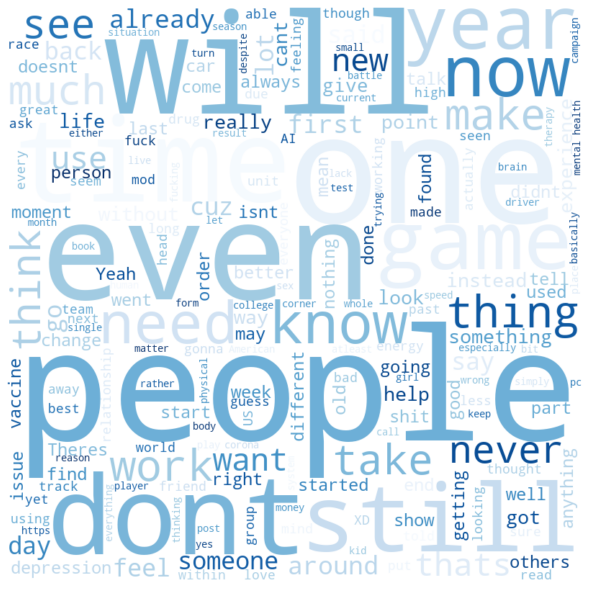

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")
nou = WordCloud().process_text(post_dmin)
print(nou)
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
# for val in df.CONTENT:
     
#     # typecaste each val to string
#     val = str(val)
 
#     # split the value
#     tokens = val.split()
     
#     # Converts each token into lowercase
#     for i in range(len(tokens)):
#         tokens[i] = tokens[i].lower()
     
#     comment_words += " ".join(tokens)+" "
 
comment_words = "deci nu inteleg nimic dar nimic, doamne ajuta sa fie bine cat de cat"
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                colormap= '',
                min_font_size = 10).generate_from_frequencies(nou)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [28]:
!pip install multidict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.9 MB/s 


In [29]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

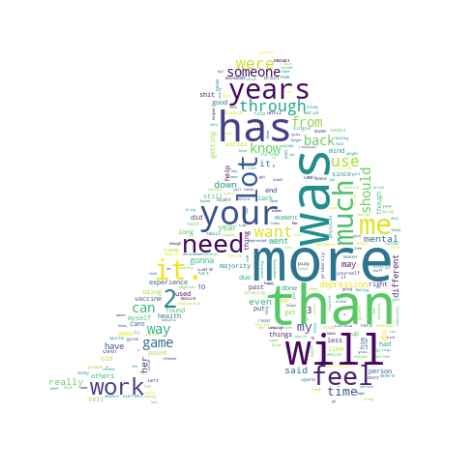

In [40]:
import pathlib



def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text, path):
    alice_mask = np.array(Image.open(path))

    wc = WordCloud(background_color="white", max_words=1000, mask=alice_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


makeImage(getFrequencyDictForText(post_dmin),"drive/MyDrive/pls.jpg")


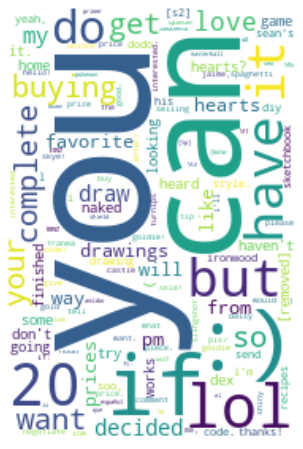

In [44]:
makeImage(getFrequencyDictForText(post_du),"drive/MyDrive/p1.png")